In [1]:
from __future__ import division
from __future__ import print_function

import sys
import argparse
import cv2
import editdistance
from DataLoader import DataLoader, Batch
from Model import Model, DecoderType
from SamplePreprocessor import preprocess


class FilePaths:
	"filenames and paths to data"
	fnCharList = '../model/charList.txt'
	fnAccuracy = '../model/accuracy.txt'
	fnTrain = '../data/'
	fnInfer = '../data/test.png'
	fnCorpus = '../data/corpus.txt'

In [ ]:

'''

def train(model, loader):
	"train NN"
	epoch = 0 # number of training epochs since start
	bestCharErrorRate = float('inf') # best valdiation character error rate
	noImprovementSince = 0 # number of epochs no improvement of character error rate occured
	earlyStopping = 5 # stop training after this number of epochs without improvement
	while True:
		epoch += 1
		print('Epoch:', epoch)

		# train
		print('Train NN')
		loader.trainSet()
		while loader.hasNext():
			iterInfo = loader.getIteratorInfo()
			batch = loader.getNext()
			loss = model.trainBatch(batch)
			print('Batch:', iterInfo[0],'/', iterInfo[1], 'Loss:', loss)

		# validate
		charErrorRate = validate(model, loader)
		
		# if best validation accuracy so far, save model parameters
		if charErrorRate < bestCharErrorRate:
			print('Character error rate improved, save model')
			bestCharErrorRate = charErrorRate
			noImprovementSince = 0
			model.save()
			open(FilePaths.fnAccuracy, 'w').write('Validation character error rate of saved model: %f%%' % (charErrorRate*100.0))
		else:
			print('Character error rate not improved')
			noImprovementSince += 1

		# stop training if no more improvement in the last x epochs
		if noImprovementSince >= earlyStopping:
			print('No more improvement since %d epochs. Training stopped.' % earlyStopping)
			break


def validate(model, loader):
	"validate NN"
	print('Validate NN')
	loader.validationSet()
	numCharErr = 0
	numCharTotal = 0
	numWordOK = 0
	numWordTotal = 0
	while loader.hasNext():
		iterInfo = loader.getIteratorInfo()
		print('Batch:', iterInfo[0],'/', iterInfo[1])
		batch = loader.getNext()
		(recognized, _) = model.inferBatch(batch)
		
		print('Ground truth -> Recognized')	
		for i in range(len(recognized)):
			numWordOK += 1 if batch.gtTexts[i] == recognized[i] else 0
			numWordTotal += 1
			dist = editdistance.eval(recognized[i], batch.gtTexts[i])
			numCharErr += dist
			numCharTotal += len(batch.gtTexts[i])
			print('[OK]' if dist==0 else '[ERR:%d]' % dist,'"' + batch.gtTexts[i] + '"', '->', '"' + recognized[i] + '"')
	
	# print validation result
	charErrorRate = numCharErr / numCharTotal
	wordAccuracy = numWordOK / numWordTotal
	print('Character error rate: %f%%. Word accuracy: %f%%.' % (charErrorRate*100.0, wordAccuracy*100.0))
	return charErrorRate


def infer(model, fnImg):
	"recognize text in image provided by file path"
	img = preprocess(cv2.imread(fnImg, cv2.IMREAD_GRAYSCALE), Model.imgSize)
	batch = Batch(None, [img])
	(recognized, probability) = model.inferBatch(batch, True)
	print('Recognized:', '"' + recognized[0] + '"')
	print('Probability:', probability[0])
'''


In [ ]:
'''
def main():
	"main function"
	# optional command line args
	parser = argparse.ArgumentParser()
	parser.add_argument('--train', help='train the NN', action='store_true')
	parser.add_argument('--validate', help='validate the NN', action='store_true')
	parser.add_argument('--beamsearch', help='use beam search instead of best path decoding', action='store_true')
	parser.add_argument('--wordbeamsearch', help='use word beam search instead of best path decoding', action='store_true')
	parser.add_argument('--dump', help='dump output of NN to CSV file(s)', action='store_true')

	args = parser.parse_args()

	decoderType = DecoderType.BestPath
	if args.beamsearch:
		decoderType = DecoderType.BeamSearch
	elif args.wordbeamsearch:
		decoderType = DecoderType.WordBeamSearch

	# train or validate on IAM dataset	
	if args.train or args.validate:
		# load training data, create TF model
		loader = DataLoader(FilePaths.fnTrain, Model.batchSize, Model.imgSize, Model.maxTextLen)

		# save characters of model for inference mode
		open(FilePaths.fnCharList, 'w').write(str().join(loader.charList))
		
		# save words contained in dataset into file
		open(FilePaths.fnCorpus, 'w').write(str(' ').join(loader.trainWords + loader.validationWords))

		# execute training or validation
		if args.train:
			model = Model(loader.charList, decoderType)
			train(model, loader)
		elif args.validate:
			model = Model(loader.charList, decoderType, mustRestore=True)
			validate(model, loader)

	# infer text on test image
	else:
		print(open(FilePaths.fnAccuracy).read())
		model = Model(open(FilePaths.fnCharList).read(), decoderType, mustRestore=True, dump=args.dump)
		infer(model, FilePaths.fnInfer)


if __name__ == '__main__':
	main()

'''

In [2]:
loader = DataLoader(FilePaths.fnTrain, Model.batchSize, Model.imgSize, Model.maxTextLen)
open(FilePaths.fnCharList, 'w').write(str().join(loader.charList))
open(FilePaths.fnCorpus, 'w').write(str(' ').join(loader.trainWords + loader.validationWords))

590972

In [3]:
trainWord, trainVal = loader.getTrain()

loader.trainWords
loader.trainSamples
loader.validationWords
loader.validationSamples




In [4]:
testWord, testVal = loader.getTest()

In [11]:
!pip install matplotlib
from matplotlib import pyplot as plt

     |████████████████████████████████| 13.1MB 583kB/s eta 0:00:01     |███████████████████████████▌    | 11.3MB 956kB/s eta 0:00:02
     |████████████████████████████████| 71kB 1.2MB/s eta 0:00:01
     |████████████████████████████████| 92kB 724kB/s eta 0:00:011


(95, 332)
(79, 264)
(62, 103)
(65, 411)
(71, 144)
(137, 74)
(40, 8)
(61, 293)
(78, 158)


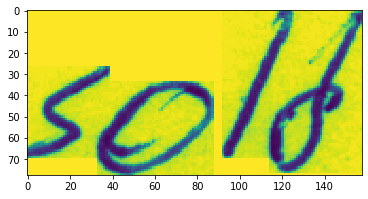

In [20]:

for i in trainVal[1:10]:
#     print(i.getText())
#     print(i.getPath())
    img = cv2.imread(i.getPath(), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img/255, cmap = 'gray')
    plt.show
    print(img.shape)

In [46]:
text = trainVal[0].gtText
path = trainVal[0].filePath
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)


In [47]:
trainVal[0].filePath
trainVal[0].gtText

'during'

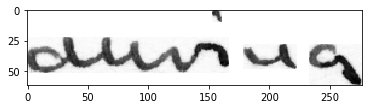

In [48]:
plt.imshow(img, cmap = 'gray')

In [33]:
from SamplePreprocessor import preprocess

In [49]:
imgs = preprocess(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (128, 32), 1)

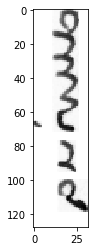

In [53]:
plt.imshow(imgs, cmap = 'gray')

In [62]:
imgs.shape

(128, 32)

 ...]